# DATA WRANGLING PROJECT 
---------------------------------------
## WeRateDogs Twitter Data

#### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import tweepy
import os
import datetime, time

#### 2. Gathering Data

In [2]:
#get the twitter-archive-enhanced data
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
#using the request library to get the image_predictions.tsv file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [17]:
# load image_prediction.tsv
prediction = pd.read_csv('image_predictions.tsv', sep = "\t")
prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# get tweet status
tweet = api.get_status(archive.tweet_id[2], tweet_mode='extended')

Unauthorized: 401 Unauthorized
89 - Invalid or expired token.

In [ ]:
# show tweet info
info = tweet._json
info

In [55]:
# create tweet_json.txt file if it is no already existing
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [56]:
# create a tweet id list
tweet_ids = archive.tweet_id.values

In [57]:
errors_tweets = []

# get start time of query
print("Start time:", datetime.datetime.now().time())
start = time.time()

# write JSON to .txt file
with open('tweet_json.txt', 'w', encoding = 'UTF-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Error in Tweet ID:", tweet_id, "Time:",  datetime.datetime.now().time())
            errors_tweets.append(tweet_id)

# get end time of query
end = time.time()
print("End time:", datetime.datetime.now().time())

# display runtime

Start time: 13:27:07.303540
Error in Tweet ID: 888202515573088257 Time: 13:27:21.652570
Error in Tweet ID: 873697596434513921 Time: 13:28:16.988866
Error in Tweet ID: 872668790621863937 Time: 13:28:21.196561
Error in Tweet ID: 872261713294495745 Time: 13:28:23.381990
Error in Tweet ID: 869988702071779329 Time: 13:28:33.983069
Error in Tweet ID: 866816280283807744 Time: 13:28:44.314762
Error in Tweet ID: 861769973181624320 Time: 13:29:00.465679
Error in Tweet ID: 856602993587888130 Time: 13:29:19.772681
Error in Tweet ID: 856330835276025856 Time: 13:29:21.919683
Error in Tweet ID: 851953902622658560 Time: 13:29:41.103683
Error in Tweet ID: 851861385021730816 Time: 13:29:41.919679
Error in Tweet ID: 845459076796616705 Time: 13:30:06.992682
Error in Tweet ID: 844704788403113984 Time: 13:30:11.203701
Error in Tweet ID: 842892208864923648 Time: 13:30:16.069687
Error in Tweet ID: 837366284874571778 Time: 13:30:51.636151
Error in Tweet ID: 837012587749474308 Time: 13:30:53.109278
Error in Twe

Rate limit reached. Sleeping for: 126


Error in Tweet ID: 754011816964026368 Time: 13:42:32.325297
Error in Tweet ID: 680055455951884288 Time: 13:52:31.968876


Rate limit reached. Sleeping for: 224


End time: 14:04:20.961679


In [58]:
# display error IDs
errors_tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 856330835276025856,
 851953902622658560,
 851861385021730816,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 766864461642756096,
 759923798737051648,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [59]:
# extract data from tweet_json.txt file
df_tweets = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        df_tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})    

In [60]:
# create dataframe
df_api = pd.DataFrame(df_tweets, columns= ['tweet_id',
                                           'retweet_count',
                                           'favorite_count'])

In [61]:
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33824
1,892177421306343426,5302,29337
2,891815181378084864,3482,22069
3,891689557279858688,7228,36950
4,891327558926688256,7764,35321


In [62]:
# save dataframe
df_api.to_csv('df_tweets.csv')

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
tweets_df = pd.read_csv('df_tweets.csv')

## Data Claening

#### Assessing Data: Quality and Tidiness Issues

> Visual assesment

In [4]:
# display complete row
pd.set_option('display.max_colwidth', None)
display(archive.head(10))
display(archive.tail(10))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

> programatic assessment

In [5]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
#checkign for unique tweet_id values
archive.tweet_id.nunique()

2356

In [7]:
#checking for null values
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
# count numbers of values in columns doggo, floofer, pupper and puppo
(archive.loc[:, 'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [9]:
# check whether all dog names are filled
archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
                 ... 
Michelangelope      1
Dot                 1
Geno                1
Lucky               1
Robin               1
Name: name, Length: 957, dtype: int64

In [10]:
# check whether rating_numerator is always filled
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [12]:
# check whether rating_demoninator is always filled
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [14]:
# check sources
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

###### PREDICTION TABLE

> Visual Assessment

In [18]:
display(prediction.head())
display(prediction.tail())

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


> Programatic Assessment

In [19]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#checking for null values
prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

###### TWEET_DF TABLE

> Visual Assesment

In [21]:
display(tweets_df.head())
display(tweets_df.tail())

,Unnamed: 0,tweet_id,retweet_count,favorite_count
0,0,892420643555336193,7010,33824
1,1,892177421306343426,5302,29337
2,2,891815181378084864,3482,22069
3,3,891689557279858688,7228,36950
4,4,891327558926688256,7764,35321


,Unnamed: 0,tweet_id,retweet_count,favorite_count
2322,2322,666049248165822465,37,89
2323,2323,666044226329800704,115,247
2324,2324,666033412701032449,36,100
2325,2325,666029285002620928,39,112
2326,2326,666020888022790149,423,2292


> Programatic Assessment

In [22]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      2327 non-null   int64
 1   tweet_id        2327 non-null   int64
 2   retweet_count   2327 non-null   int64
 3   favorite_count  2327 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


In [23]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


#### QUALITY
###### 'archive' Table
- There are 23 cases where the denominator of rating != 10. These entries will be removed. It is possible some of these entries are genuine tweets, in which case each of these entries would have to be inspected individually.
-  Multiple cases of where the numerator of rating < 10. These entries will be removed.
- Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic.
- Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name"
-  Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information
- Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information

###### 'prediction' Table
- Entries where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed.
- The "p1" and "p1_conf" columns will be renamed with more explanatory titles.
- The column "jpg_url" will be removed since url data is already contained in the twitter archive data
- The "p2" and "p3" related columns will be removed as I am only using the most likely prediction ("p1") in my analysis
- After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.

#### TIDINESS
###### 'archive' Table
- There are 181 retweets which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.
- There are 78 tweet replies which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.
- Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.


### CLEANING DATA

In [24]:
archive_clean = archive.copy()

##### QUALITY ISSUES

###### Define
- Removing multiple cases of where the denominator of rating != 10.

###### Code

In [25]:

archive_clean.drop(archive_clean[archive_clean.rating_denominator != 10].index, inplace = True)

In [26]:
#Tets
archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

###### Define
-  Multiple cases of where the numerator of rating < 10. These entries will be removed..

###### Code

In [27]:
archive_clean.drop(archive_clean[archive_clean.rating_numerator < 10].index, inplace = True)

In [28]:
# Test
archive_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

 I have decided to carry out steps 1 and 2 in tidiness first and then return to c) in the quality as this will likely remove many of the values present in assessment c)

#### TIDINESS

###### Define
- There are 181 retweets which need to be removed.

###### Code

In [29]:
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id.notnull()].index, inplace = True)

In [30]:
# Test
archive_clean.retweeted_status_id.notnull().sum()

0

###### Define
- There are 78 tweet replies which need to be removed. 

###### Code

In [31]:
archive_clean.drop(archive_clean[archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)

In [32]:
# Test
archive_clean.in_reply_to_status_id.notnull().sum()

0

> Moving back to the quality issues

###### Define
- Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic. 

###### Code 

In [33]:
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
14       38
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

In [34]:
# There appear to be 5 cases where the numerator is exceptionally high (> 14)

index  = [420, 1776,75,27,26]

for x in index:
    print(f'Rating number: {x}')
    for i in range(0,len(archive.index)):
        if archive.rating_numerator[i] == x:
            print(archive.tweet_id[i])
            print(archive.text[i])
            print(archive.expanded_urls[i])
            print(archive.retweeted_status_id[i])
            print(archive.in_reply_to_status_id[i])
            print(archive.source[i])
            print(archive.index[i])
            print('\n')

        else:
            pass

Rating number: 420
855862651834028034
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
nan
nan
8.558615844633518e+17
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
188


670842764863651840
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
https://twitter.com/dog_rates/status/670842764863651840/photo/1
nan
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2074


Rating number: 1776
749981277374128128
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
https://twitter.com/dog_rates/status/749981277374128128/photo/1
nan
nan
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
979


Rating number: 75
832215909146226688
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
https://twitter.com/dog_rates/statu

In [35]:
# All 5 cases appear to be genuine. However, the numerator value is incorrect for some and will be updated:

nums = [75,27,26]
correct_vals = [9.75, 11.27, 11.26]
index_list = []

# retrieving indexes
for i in nums:
    index_list.append(archive_clean[archive_clean.rating_numerator == i].index[0])

# Replacing with correct values
for i,j in zip(index_list,correct_vals):
    archive_clean.at[i, 'rating_numerator'] = j

In [36]:
# Test
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      415
13      287
14       38
1776      1
420       1
9         1
Name: rating_numerator, dtype: int64

###### Define
- Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name"

###### Code

In [37]:
# Code
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',\
             'rating_numerator': 'dog_rating_out_of_ten', 'name': 'dog_name'}


archive_clean.rename(columns=new_names, inplace=True)

In [38]:
# Test
list(archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

###### Define

- Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.

- Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.

###### Code


In [39]:
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id','retweeted_status_timestamp','rating_denominator']

archive_clean.drop(drop_cols, inplace=True, axis=1)

In [40]:
# Test
list(archive_clean.columns)

['tweet_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### TIDINESS ISSUE

###### Define
- Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format and make the datatype category.

###### Code

In [41]:
archive_clean = archive_clean.reset_index()
del archive_clean['index']

In [42]:
archive_clean['dog_category'] = 'NaN'

In [43]:
# Creating a single column for dog category

for i in range(0, len(archive_clean.index)):
    if archive_clean.loc[i, 'doggo'] == 'doggo':
        archive_clean.loc[i, 'dog_category'] = 'doggo'
    elif archive_clean.loc[i, 'floofer'] == 'floofer':
        archive_clean.loc[i, 'dog_category'] = 'floofer'
    elif archive_clean.loc[i, 'pupper'] == 'pupper':
        archive_clean.loc[i, 'dog_category'] = 'pupper'
    elif archive_clean.loc[i, 'puppo'] == 'puppo':
        archive_clean.loc[i, 'dog_category'] = 'puppo'
    else:
        archive_clean.loc[i, 'dog_category'] = 'None'

In [44]:
# Checking for entries labelled with multiple categories

multi_cat_list = []

for i in range(0, len(archive_clean.index)):
    if archive_clean.doggo[i] == 'doggo' and (archive_clean.floofer[i] == 'floofer' \
                                                   or archive_clean.pupper[i] == 'pupper'\
                                                   or archive_clean.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[153, 160, 354, 411, 441, 531, 556, 677, 813, 852]
10


>10 cases of multiple categories found 
>Checking text of entry to correct category to correct values

In [45]:
# Index 153    
archive_clean.loc[153, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           doggo
floofer          None
pupper           None
puppo           puppo
dog_category    doggo
Name: 153, dtype: object

In [46]:
archive_clean.tweet_text[153]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [47]:
# Incorreclty labelled as "doggo", correcting to "puppo"

archive_clean.loc[153, 'dog_category'] = 'puppo'

In [48]:
# Index 160
archive_clean.loc[160, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo             doggo
floofer         floofer
pupper             None
puppo              None
dog_category      doggo
Name: 160, dtype: object

In [49]:
archive_clean.tweet_text[160]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [50]:
# Index 354
archive_clean.loc[354, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 354, dtype: object

In [51]:
archive_clean.tweet_text[354]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [52]:
# Correcting to "pupper"
archive_clean.loc[354, 'dog_category'] = 'pupper'

In [53]:
# Index 411 
archive_clean.loc[411, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 411, dtype: object

In [54]:
archive_clean.tweet_text[411]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [55]:
# Correcting and adding category to represent that there is multiple dogs/categories present: "multiple"
archive_clean.loc[411, 'dog_category'] = 'multiple'

In [56]:
# Index 441 
archive_clean.loc[441, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 441, dtype: object

In [57]:
archive_clean.tweet_text[441]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [58]:
# Correcting to "pupper"
archive_clean.loc[441, 'dog_category'] = 'pupper'

In [59]:
# Index 531
archive_clean.loc[531, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 531, dtype: object

In [60]:
archive_clean.tweet_text[531]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [61]:
# Index 556 
archive_clean.loc[556, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 556, dtype: object

In [62]:
archive_clean.tweet_text[556]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [63]:
# Correcting to "multiple"
archive_clean.loc[556, 'dog_category'] = 'multiple'

In [64]:
# Index 677
archive_clean.loc[677, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 677, dtype: object

In [65]:
archive_clean.tweet_text[677]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [66]:
# Correcting to "multiple"
archive_clean.loc[677, 'dog_category'] = 'multiple'

In [67]:
# Index 813
archive_clean.loc[813, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 813, dtype: object

In [68]:
archive_clean.tweet_text[813]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [69]:
# Correcting to "multiple"
archive_clean.loc[813, 'dog_category'] = 'multiple'

In [70]:
# Index 852
archive_clean.loc[852, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 852, dtype: object

In [71]:
archive_clean.tweet_text[852]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [72]:
# Correcting to "multiple"
archive_clean.loc[852, 'dog_category'] = 'multiple'

In [73]:
# dropping original dog category columns

# Test
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(drop_cats, axis=1, inplace=True)

In [74]:
archive_clean.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,None


##### PREDICTION DATA

In [75]:
prediction_clean= prediction.copy()

##### QUALITY ISSUE

###### Define

- Entries where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed. 

###### Code

In [76]:
prediction_clean.drop(prediction_clean[prediction_clean.p1_dog == False].index, inplace=True)

In [77]:
# Test
prediction_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

###### Define
- The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

###### Code

In [78]:
new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

prediction_clean.rename(columns= new_col_names, inplace=True)

In [79]:
# Test
list(prediction_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

###### Define

- The column "jpg_url" will be removed since url data is already contained in the twitter archive data (expanded_urls)

- The "p2" and "p3" related columns will be removed as I am only using the most likely prediction ("p1") in my analysis

- After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.

###### Code

In [80]:
preds_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

prediction_clean.drop(preds_drop_cols, inplace=True, axis=1)

In [81]:
# Test
list(prediction_clean.columns)

['tweet_id', 'img_num', 'dog_breed_prediction', 'prediction_confidence']

#### COMBINING THE DATA

In [82]:
prediction_clean.head(1)

,tweet_id,img_num,dog_breed_prediction,prediction_confidence
0,666020888022790149,1,Welsh_springer_spaniel,0.465074


In [83]:
# Merging dataframes to create a master dataframe 

master_df_pt1 = pd.merge(archive_clean, prediction_clean, on='tweet_id', how='left')

In [84]:
master_df_pt1.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category,img_num,dog_breed_prediction,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,None,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,None,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,None,2.0,basset,0.555712


In [85]:
master_df_pt1.head(1)

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category,img_num,dog_breed_prediction,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None,NaN,NaN,NaN


In [88]:
tweets_df_clean = tweets_df.copy()

In [89]:
master_df = master_df_pt1.merge(tweets_df_clean,on=['tweet_id'],how='left')

In [90]:
master_df.head(1)

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category,img_num,dog_breed_prediction,prediction_confidence,Unnamed: 0,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None,NaN,NaN,NaN,0.0,7010.0,33824.0


In [91]:
# Saving data to csv

master_df.to_csv('twitter_archive_master.csv')
archive_clean.to_csv('clean_twitter_archive_data.csv')
prediction_clean.to_csv('clean_image_prediction_data.csv')
tweets_df_clean.to_csv('clean_rt_and_fav_data.csv')

#### ANALYSIS

In [92]:
def plot_palette():
    sns.set()
    current_palette = sns.color_palette(my_palette)
    sns.set_palette(current_palette)

In [93]:
# define color palette
my_palette = (sns.color_palette("RdBu_r", 7))
plot_palette()

In [95]:
master_df.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category,img_num,dog_breed_prediction,prediction_confidence,Unnamed: 0,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None,NaN,NaN,NaN,0.0,7010.0,33824.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None,1.0,Chihuahua,0.323581,1.0,5302.0,29337.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,None,1.0,Chihuahua,0.716012,2.0,3482.0,22069.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,None,NaN,NaN,NaN,3.0,7228.0,36950.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,None,2.0,basset,0.555712,4.0,7764.0,35321.0


In [96]:
master_df.dog_category.value_counts()

None        1373
pupper       184
doggo         71
puppo         23
floofer        9
multiple       5
Name: dog_category, dtype: int64

In [97]:
master_df.dog_rating_out_of_ten.describe()

count    1665.000000
mean       12.747748
std        44.396569
min         9.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: dog_rating_out_of_ten, dtype: float64

In [98]:
master_df.dog_breed_prediction.value_counts()

golden_retriever          127
Labrador_retriever         83
Pembroke                   83
Chihuahua                  62
chow                       41
                         ... 
curly-coated_retriever      1
Tibetan_terrier             1
standard_schnauzer          1
Appenzeller                 1
EntleBucher                 1
Name: dog_breed_prediction, Length: 109, dtype: int64

In [99]:
tweets_df_clean.retweet_count.describe()

count     2327.000000
mean      2472.200258
std       4186.641699
min          1.000000
25%        495.000000
50%       1149.000000
75%       2862.500000
max      70777.000000
Name: retweet_count, dtype: float64

In [100]:
tweets_df_clean.retweet_count.describe()

count     2327.000000
mean      2472.200258
std       4186.641699
min          1.000000
25%        495.000000
50%       1149.000000
75%       2862.500000
max      70777.000000
Name: retweet_count, dtype: float64

In [101]:
tweets_df_clean.favorite_count.describe()

count      2327.000000
mean       7057.141813
std       10966.381302
min           0.000000
25%        1226.000000
50%        3053.000000
75%        8610.500000
max      144936.000000
Name: favorite_count, dtype: float64

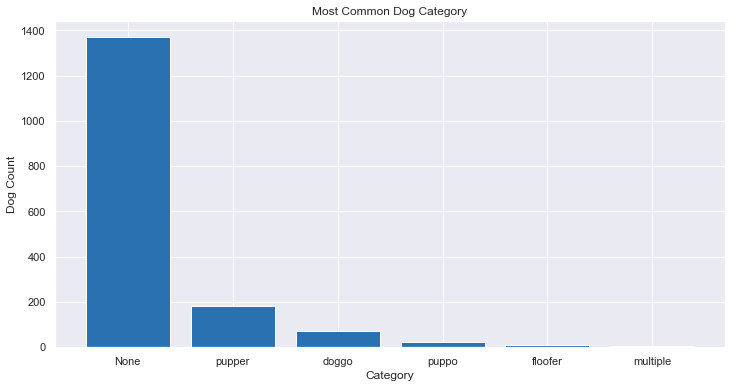

In [102]:

dog_type =master_df.dog_category.value_counts().index
dog_counts = master_df.dog_category.value_counts()

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

###### RETWEETS OVER TIME

In [103]:
master_df['tweet_timestamp'] = pd.to_datetime(archive.timestamp)

In [104]:
retweets = master_df.groupby(pd.Grouper(key='tweet_timestamp', freq='1w'))['retweet_count'].sum().reset_index().sort_values('tweet_timestamp')[:-1]

Text(0, 0.5, 'Count Retweets')

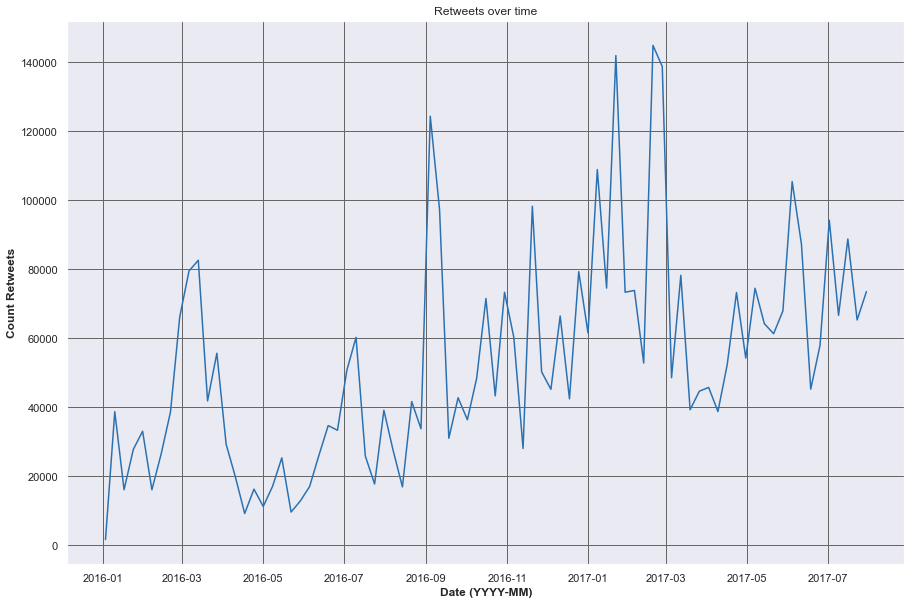

In [105]:
plt.subplots(figsize=(15, 10))
plt.plot(retweets.tweet_timestamp, retweets.retweet_count)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Retweets over time')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count Retweets', weight='bold')

#### Favorites over time

In [106]:
favorites = master_df.groupby(pd.Grouper(key='tweet_timestamp', freq='1w'))['favorite_count'].sum().reset_index().sort_values('tweet_timestamp')[:-1]

Text(0, 0.5, 'Count Favorites')

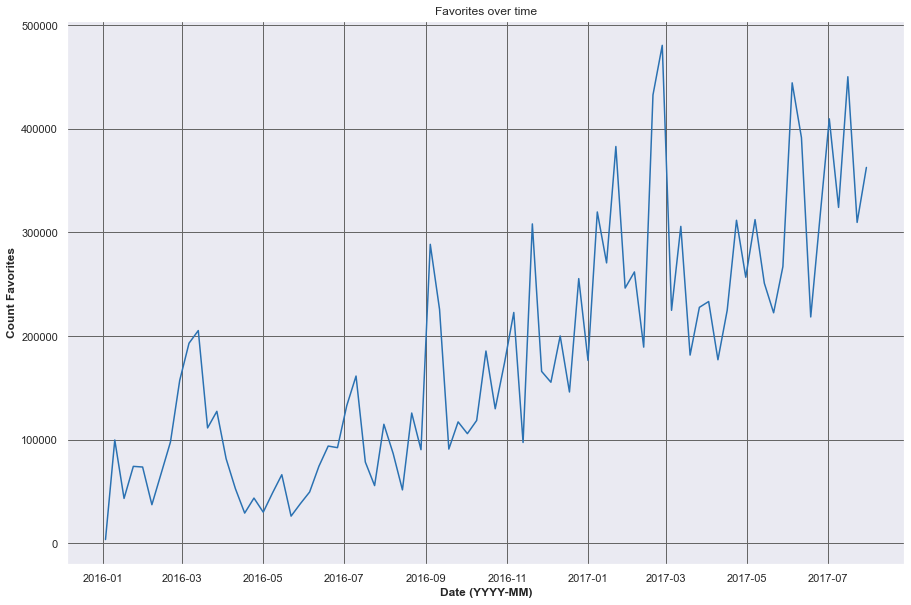

In [107]:
plt.subplots(figsize=(15, 10))
plt.plot(favorites.tweet_timestamp, favorites.favorite_count)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Favorites over time')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count Favorites', weight='bold')

##### Retweets and Favorites in comparision

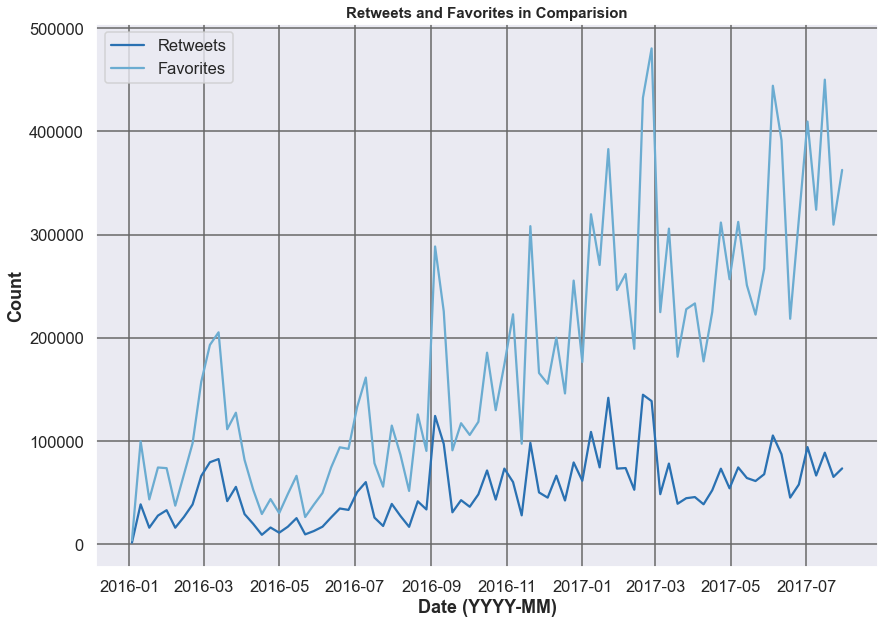

In [108]:
sns.set_context("talk")
plt.subplots(figsize=(14, 10))
plt.plot(retweets.tweet_timestamp, retweets.retweet_count, label="Retweets")
plt.plot(favorites.tweet_timestamp, favorites.favorite_count, label="Favorites")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title('Retweets and Favorites in Comparision', fontsize=15, weight='bold')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend()
plt.savefig('tweet_fav_comp.png');

### Insights
- The most popular dog type is a "pupper"
- The most popular dog, based on image predictions, is a Golden Retriever
- The median and mean retweet count is 1149 and 2472 respectively
- The median and mean favorite count is 3053 and 7057 respectively

### Sources
- https://stackoverflow.com/questions/45123924/convert-pandas-dataframe-from-wide-to-long
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html
- https://aviaryan.in/blog/gsoc/downloading-files-from-urls.html
- https://stackoverflow.com/questions/44699682/how-to-save-a-file-downloaded-from-requests-to-another-directory
- https://wiki.python.org/moin/HandlingExceptions
- http://pbpython.com/pandas-list-dict.html
- http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
- https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
- https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-data-frame
- https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index
- https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
- https://stackoverflow.com/questions/40319743/plotting-a-bar-graph-in-python-with-matplotlib-pyplot
- https://pythonspot.com/matplotlib-bar-chart/
- https://stackoverflow.com/questions/46799662/missing-data-in-pandas-merge
- https://stackoverflow.com/questions/46754398/pandas-merge-returns-nan
- https://pandas.pydata.org/pandas-docs/stable/merging.html
- https://www.youtube.com/watch?v=9uPTA9racZ0
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://stackoverflow.com/questions/12451431/loading-and-parsing-a-json-file-with-multiple-json-objects-in-python/12451465#12451465

In [109]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1665 entries, 0 to 1664
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1665 non-null   int64              
 1   tweet_timestamp        1665 non-null   datetime64[ns, UTC]
 2   source                 1665 non-null   object             
 3   tweet_text             1665 non-null   object             
 4   expanded_urls          1662 non-null   object             
 5   dog_rating_out_of_ten  1665 non-null   int64              
 6   dog_name               1665 non-null   object             
 7   dog_category           1665 non-null   object             
 8   img_num                1231 non-null   float64            
 9   dog_breed_prediction   1231 non-null   object             
 10  prediction_confidence  1231 non-null   float64            
 11  Unnamed: 0             1657 non-null   float64          

In [111]:
master_df.dog_name.value_counts().head(8)

None       466
a           29
Charlie     11
Lucy        10
Oliver       9
Cooper       9
Tucker       8
Penny        7
Name: dog_name, dtype: int64

In [123]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      2327 non-null   int64
 1   tweet_id        2327 non-null   int64
 2   retweet_count   2327 non-null   int64
 3   favorite_count  2327 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


In [125]:
master_df.dog_category.value_counts()

None        1373
pupper       184
doggo         71
puppo         23
floofer        9
multiple       5
Name: dog_category, dtype: int64

In [ ]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [184, 72, 23, 9, 5]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()
plt.savefig()